# IMPORTS

In [108]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
import folium 

from warnings import filterwarnings

filterwarnings('ignore')
%matplotlib inline

# READ THE DATA (main .csv file with data and .txt file with countries corrds)

In [109]:
data = pd.read_csv('./input/mad_project.csv')
locations = pd.read_csv('./input/loc_df.txt')
#data.head()
data.tail()

,countrycode,country,year,gdppc,pop
21677,ZWE,Zimbabwe,2014,1 594,13 314
21678,ZWE,Zimbabwe,2015,1 560,13 479
21679,ZWE,Zimbabwe,2016,1 534,13 665
21680,ZWE,Zimbabwe,2017,1 582,13 870
21681,ZWE,Zimbabwe,2018,1 611,14 097


In [110]:
locations

,CountryCode,Latitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


# TRY TO SHOW MAP WITH FOLIUM LIBRARY

In [111]:
countries = data['country'].unique()

In [112]:
local_ = {country: (lat, lon) for lat, lon, country in zip(locations['Latitude'], locations['Longitude'], locations['Name'])}

In [113]:
map = folium.Map(location=local_['Former USSR'], zoom_start=3)
for corr in local_:
    folium.Marker(local_[corr], popup=f'<b>{corr}</b>', tooltip=f'Iam {corr}').add_to(map)

In [114]:
map

# OK ITS WORKS. LETS GO TO ANOTHER TASKS

# SOME EDA 

In [115]:
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3 280
1,AFG,Afghanistan,1870,NaN,4 207
2,AFG,Afghanistan,1913,NaN,5 730
3,AFG,Afghanistan,1950,1 156,8 150
4,AFG,Afghanistan,1951,1 170,8 284


In [116]:
data.dropna(inplace=True)

In [117]:
data['pop'].isnull().sum()

0

In [118]:
data['gdppc'].isnull().sum()

0

In [119]:
data['pop'] = data['pop'].apply(lambda x: int(''.join(x.split())))

In [120]:
data['gdppc'] = data['gdppc'].apply(lambda x: int(''.join(x.split())))

In [121]:
data.drop('countrycode', axis=1, inplace=True)

In [122]:
data = data.reset_index()

In [123]:
data.drop('index', axis=1, inplace=True)

In [124]:
data = data.rename(columns={'gdppc':'vvp', 'pop': 'population'})

In [125]:
data

,country,year,vvp,population
0,Afghanistan,1950,1156,8150
1,Afghanistan,1951,1170,8284
2,Afghanistan,1952,1189,8425
3,Afghanistan,1953,1240,8573
4,Afghanistan,1954,1245,8728
...,...,...,...,...
15218,Zimbabwe,2014,1594,13314
15219,Zimbabwe,2015,1560,13479
15220,Zimbabwe,2016,1534,13665
15221,Zimbabwe,2017,1582,13870


In [126]:
def get_plot_df(data: pd.DataFrame, group_1: str, group_2: str, col_2: str, col_1='Country'):
    to_df = data.groupby(by=[group_1])[group_2].sum().sort_values(ascending=False)
    to_df = to_df[:10]
    to_df = dict(to_df)
    
    to_df = pd.DataFrame({col_1: to_df.keys(), col_2: [to_df[x] for x in to_df.keys()]})
    
    return to_df    

In [127]:
lr_pop = get_plot_df(data=data, group_1='country', group_2='population', col_2='Pop_growth')
lr_vvp = get_plot_df(data=data, group_1='country', group_2='vvp', col_2='vvp_growth')

In [135]:
map_pop = data.groupby(by=['country'])['population'].sum().sort_values(ascending=False)
vvp_val = data.groupby(by=['country'])['vvp'].sum().sort_values(ascending=False)

In [129]:
lr_pop # DF to plotting

,Country,Pop_growth
0,China,79228912
1,India,76268955
2,United States,25026726
3,Former USSR,22598742
4,Indonesia,16040141
5,Japan,11719157
6,Brazil,11181227
7,Germany,10758001
8,France,8891882
9,United Kingdom,8678298


In [130]:
lr_vvp

,Country,vvp_growth
0,Qatar,4141439
1,United States,3233719
2,United Arab Emirates,2911696
3,Norway,2895779
4,Switzerland,2883428
5,Kuwait,2833489
6,Australia,2643008
7,Netherlands,2529338
8,Denmark,2521762
9,United Kingdom,2496281


In [131]:
def top_10(data: pd.DataFrame, col_1: str, col_2: str, title: str, xlabel: str, ylabel: str) -> sns.barplot:
    
    sns.set_theme(style="darkgrid")
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xticks(fontsize=13, rotation=45)
    plt.yticks(fontsize=13)
    plt.xlabel(xlabel, size=13)
    plt.ylabel(ylabel, size=13)
    
    sns.barplot(data=data, x=col_1, y=col_2)

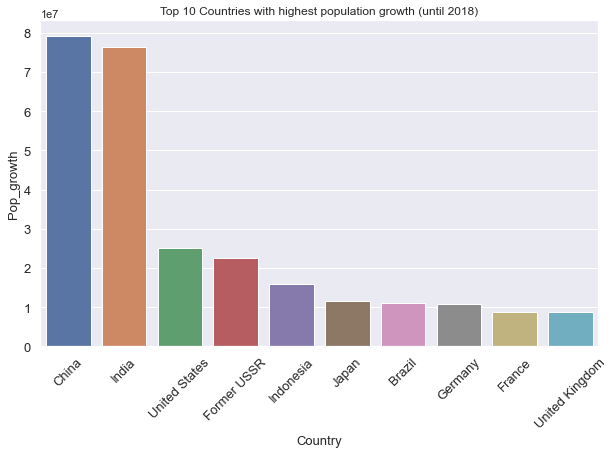

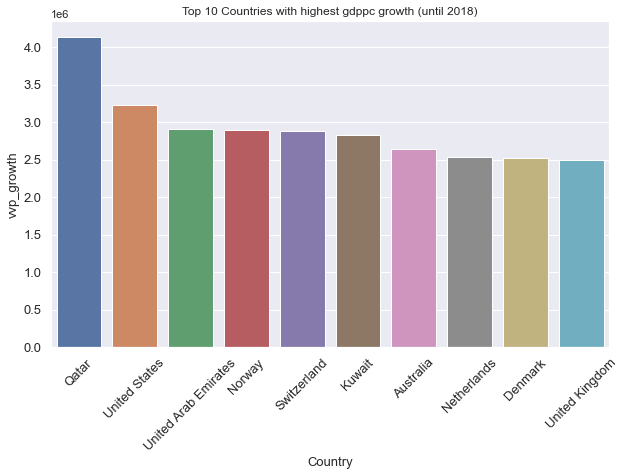

In [132]:
pop_title = 'Top 10 Countries with highest population growth (until 2018)'
gdppc_title = 'Top 10 Countries with highest gdppc growth (until 2018)'

top_10(data=lr_pop, col_1='Country', col_2='Pop_growth', title=pop_title, xlabel='Country', ylabel='Pop_growth')
top_10(data=lr_vvp, col_1='Country', col_2='vvp_growth', title=gdppc_title, xlabel='Country', ylabel='gdppc_growth')

# Let's make our map more interactive

In [136]:
map = folium.Map(location=local_['Former USSR'], tiles='OpenStreetMap', zoom_start=3) # Former USSR == Russia

for country in map_pop.keys():
    
    if country in local_:
        folium.Marker(local_[country], popup=f'<b>Population growth: {map_pop[country]}</b> <b>GDPPC growth: {vvp_val[country]}</b>', tooltip=f'<b>{country}</b>').add_to(map)

In [137]:
map